# Clase Text Analysis 1

Material preparado [SICSS Chile 2023](https://sicss.io/2023/chile/schedule). Síentete libre de utilizarlo, modificarlo y compartirlo.

**Autor**: Jorge Ortiz Fuentes


## Objetivos

Los objetivos de la clase son:
* Cargar y explorar un corpus de texto.
* Preprocesar el texto (tokenización, lematización).
* Explorar el corpus a nivel palabras (palabras más frecuentes, n-gramas).
* Representar el texto en forma de vectores (bag-of-words, TF-IDF).
* Extraer tópicos del texto (LDA).
* Etiquetar el texto con categorías gramáticales (POS tagging) y entidades nombradas (NER)

Para ello, vamos a trabajar con un corpus de 10.000 noticias chilenas del periodo comprendido entre octubre y diciembre de 2019. El corpus se encuentra en el archivo `noticias_oct_dic_2019.tsv` y contiene las siguientes columnas:

* `texto`: texto de la noticia.
* `medio`: medio de comunicación que publicó la noticia.
* `fecha`: fecha de publicación de la noticia.

En esta clase se introducen algunas técnicas de procesamiento y análisis de texto. Para ello se trabajará con las librerías `pandas` y `spaCy`, y `scikit-learn`.



## Carga y exploración de textos

Las noticias se encuentran en un archivo `tsv` (tab-separated values), que es un formato de archivo de texto plano que utiliza tabuladores para separar los campos. 

In [1]:
import pandas as pd
df = pd.read_csv('noticias_oct_dic_2019.tsv', sep='\t')
df

,texto,medio,fecha
0,Rey de Tailandia despoja de títulos a su conso...,El Mercurio,2019-10-21 14:51:00
1,Denuncian que personas con epilepsia sufrieron...,El Mercurio,2019-12-18 12:12:00
2,Índice victimización de hogares en el país suf...,El Mercurio,2019-10-15 09:58:00
3,"Meditación, cocina, jardinería, manualidades: ...",El Mercurio,2019-11-16 16:42:00
4,Director de empresa que procesa datos electora...,El Mercurio,2019-11-01 05:25:00
...,...,...,...
9995,Encuentran la mano de un turista desaparecido ...,La RED,2019-11-13 12:53:26
9996,“El problema grave es que a todos les sirve la...,La RED,2019-12-02 12:39:48
9997,Alcaldesa de Antofagasta realiza balance de lo...,La RED,2019-10-22 14:25:46
9998,John Cusack envió su apoyo a las manifestacion...,La RED,2019-10-29 12:15:45


Para ver cuántas noticias hay en el corpus por cada medio, podemos usar el método `value_counts()` de `pandas`:

In [2]:
df["medio"].value_counts()

medio
El Mercurio        1000
Cooperativa CL     1000
CHV                1000
MEGA               1000
La Discusión       1000
El Rancaguino      1000
La Nación          1000
Radio Concierto    1000
The Clinic         1000
La RED             1000
Name: count, dtype: int64

Si se desea contar la cantidad de caracteres de un texto se puede ocupar la función `len()` de Python:

In [3]:
ejemplo = "soy un texto de prueba de 39 caracteres" 
len(ejemplo)

39

A continuación, vamos a contar cuántos caracteres posee cada noticia. Para ello, podemos definir una función que cuente los caracteres de un texto y luego aplicarla a cada noticia usando el método `apply()` de `pandas`:

In [4]:
def contar_caracteres(texto):
    return len(texto)

df["caracteres"] = df["texto"].apply(contar_caracteres)

df

,texto,medio,fecha,caracteres
0,Rey de Tailandia despoja de títulos a su conso...,El Mercurio,2019-10-21 14:51:00,2127
1,Denuncian que personas con epilepsia sufrieron...,El Mercurio,2019-12-18 12:12:00,1591
2,Índice victimización de hogares en el país suf...,El Mercurio,2019-10-15 09:58:00,3410
3,"Meditación, cocina, jardinería, manualidades: ...",El Mercurio,2019-11-16 16:42:00,5625
4,Director de empresa que procesa datos electora...,El Mercurio,2019-11-01 05:25:00,2856
...,...,...,...,...
9995,Encuentran la mano de un turista desaparecido ...,La RED,2019-11-13 12:53:26,1682
9996,“El problema grave es que a todos les sirve la...,La RED,2019-12-02 12:39:48,318
9997,Alcaldesa de Antofagasta realiza balance de lo...,La RED,2019-10-22 14:25:46,216
9998,John Cusack envió su apoyo a las manifestacion...,La RED,2019-10-29 12:15:45,1918


Luego, podemos obtener el promedio de caracteres por noticia, la desviación estándar, el mínimo y el máximo, y los cuartiles usando el método `describe()` de `pandas`:

In [5]:
df["caracteres"].describe()

count    10000.000000
mean      2016.116300
std       2388.039659
min         34.000000
25%       1057.750000
50%       1641.000000
75%       2424.000000
max      98935.000000
Name: caracteres, dtype: float64

Hay noticias que poseen apenas 34 caracteres y otras con 98935 caracteres. Estos se alejan significativamente de la media de 2016 caracteres por noticia. 

Estos datos se consideran `outliers`. Para ver cuáles son las noticias más cortas y más largas, podemos ordenar el `DataFrame` por la columna `caracteres` usando el método `sort_values()` de `pandas`:



In [6]:
df.sort_values(by="caracteres")

,texto,medio,fecha,caracteres
8316,Una mala y una buena para La Roja\n,The Clinic,2019-10-14 20:04:40,34
1907,Marcador Virtual: Perú vs. Uruguay\n,Cooperativa CL,2019-10-15 12:00:00,35
1964,Marcador Virtual: Angola vs. Brasil\n,Cooperativa CL,2019-11-01 12:00:00,36
1492,Marcador Virtual: Chile vs. Uruguay\n,Cooperativa CL,2019-10-08 12:00:00,36
9234,El Abogado Martes 24 de Diciembre 2019\n,La RED,2019-12-24 09:05:19,39
...,...,...,...,...
8903,Marcelo Díaz: “La gente solo ha vivido ‘tiempo...,The Clinic,2019-10-25 11:16:07,31137
1473,[Minuto a Minuto] Fracaso opositor: Diputados ...,Cooperativa CL,2019-10-01 20:06:00,37634
1510,[Minuto a Minuto] Falla en un tren complica aú...,Cooperativa CL,2019-10-28 12:31:00,77022
1184,[Minuto a Minuto] Carabineros: Hay 180 detenid...,Cooperativa CL,2019-10-19 02:41:00,85171


Si deseamos ver el texto completo de una noticia, podemos usar el método `iloc[]` de `pandas` para acceder a una noticia en particular. Por ejemplo, para ver la noticia 8316 podemos hacer lo siguiente:

In [7]:
df.iloc[8316]["texto"]

'Una mala y una buena para La Roja\n'

In [8]:
df.iloc[1490]["texto"]

'[Minuto a Minuto] Noche de descontrol, destrucción y toque de queda en Chile \nSigue el Minuto a Minuto con los incidentes en regiones\nSe decretó toque de queda en Valparaíso y estado de excepción en Concepción debido a los desmanes. El Presidente Piñera anunció la suspensión del alza de la tarifa del Metro. El toque de queda se inició a las 22:00 horas y se extenderá hasta las 07:00 del domingo en la capital. \nLEER ARTICULO COMPLETO\nSuscríbete a nuestro newsletter\n00:19 - \n| Carabineros detuvo a 17 personas en saqueo a supermercado Santa Isabel en Santa Rosa con Arauco, en el centro de Santiago #CooperativaToque\nEn calles Santa Rosa con Arauco, Santiago Centro, personal de Carabineros logra frustrar saqueo a supermercado Santa Isabel y detiene a 17 delincuentes. pic.twitter.com/ITlroqyrDa— Carabineros de Chile (@Carabdechile) October 20, 2019 \n00:09 - \n| Senador Felipe Harboe (PPD): "Gobiernen, restablezcan la paz y tranquilidad y comuniquen a ciudadanía para dar señal de con

Vamos a eliminar los `outliers` del corpus. Para ello, vamos a utilizar el Rango Intercuartil (IQR), que corresponde a la diferencia entre el tercer y el primer cuartil. 

Luego, vamos a eliminar las noticias que se encuentren fuera del rango $[Q_1 - 1.5 \times IQR]$ (valores menores a este rango) y $[Q_3 + 1.5 \times IQR]$ (valores mayores a este rango).

<center><image src="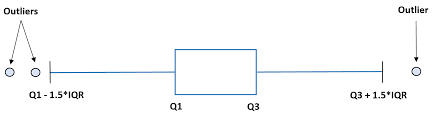" alt="Ejemplo IQR"></center>

In [9]:
# Calculamos el IQR
q3 = df['caracteres'].quantile(0.75)
q1 = df['caracteres'].quantile(0.25)
iqr = q3 - q1

iqr1_5_menor = q1 - 1.5 * iqr
iqr1_5_mayor = q3 + 1.5 * iqr

print(iqr1_5_menor)
print(iqr1_5_mayor)

-991.625
4473.375


In [10]:
# Ahora podemos filtrar el dataframe para quedarnos con los valores que están dentro del rango 1.5 * IQR 
df_filtrado = df[(df['caracteres'] > iqr1_5_menor) & (df['caracteres'] < iqr1_5_mayor)]

In [11]:
df_filtrado.describe()

,caracteres
count,9396.000000
mean,1662.195083
std,970.937822
min,34.000000
25%,1014.000000
50%,1572.000000
75%,2231.000000
max,4472.000000


## Preprocesamiento de textos

Un paquete muy útil para el procesamiento de textos es `spaCy`, que permite realizar diversas tareas de procesamiento de lenguaje natural. Para instalarlo, se puede ejecutar el siguiente comando en la consola:

### Instalación de spaCy

In [12]:
!pip install spacy

Luego podemos descargar la versión en español del modelo `spaCy`:

In [13]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 27.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Y podemos cargar el modelo:

In [14]:
import spacy
nlp = spacy.load("es_core_news_sm")

### Tokenización

Para trabajar con los textos, necesitamos separarlos en unidades de análisis. Este proceso se conoce como `tokenización`, pues se separa el texto en `tokens`. En este caso, vamos a separar los textos en palabras o símbolos de puntuación. 

Seleccionemos un texto al azar para ver cómo funciona la tokenización de `spaCy`:

In [15]:
texto_prueba = df_filtrado.iloc[22]["texto"]
texto_tokenizado = [token.text for token in nlp(texto_prueba)]
texto_tokenizado

['El',
 'estallido',
 'social',
 'bajó',
 'del',
 'Dakar',
 'al',
 'mejor',
 'chileno',
 'en',
 'autos',
 ':',
 '"',
 'Es',
 'una',
 'pena',
 ',',
 'pero',
 'más',
 'pena',
 'me',
 'da',
 'el',
 'descalabro',
 'local',
 '"',
 '\n',
 'El',
 'nombre',
 'de',
 'Boris',
 'Garafulic',
 'como',
 'representante',
 'chileno',
 'en',
 'el',
 'Rally',
 'Dakar',
 'se',
 'había',
 'hecho',
 'una',
 'costumbre',
 'para',
 'los',
 'fanáticos',
 'y',
 'la',
 'organización',
 '.',
 'Desde',
 'el',
 '2011',
 ',',
 'el',
 'piloto',
 'no',
 'se',
 'había',
 'perdido',
 'ninguna',
 'edición',
 'de',
 'la',
 'prueba',
 'motor',
 'más',
 'dura',
 'del',
 'mundo',
 ',',
 'en',
 'la',
 'que',
 'por',
 'rendimiento',
 'es',
 'el',
 'mejor',
 'chileno',
 'en',
 'automóviles',
 '.',
 '\n\n',
 'Pero',
 'esa',
 'impresionante',
 'seguidilla',
 'se',
 'verá',
 'interrumpida',
 'para',
 'este',
 '2020',
 '.',
 'A',
 'última',
 'hora',
 ',',
 'el',
 '"',
 'Maestrito',
 '"',
 'decidió',
 'bajarse',
 'de',
 'la',
 'com

### Lematización

Se conoce como `lematización` al proceso de reducir las palabras a su forma base o `lema`. Por ejemplo, el lema de las palabras `corriendo`, `correr` y `corrió` es `correr`.

Para lematizar un texto, podemos usar el atributo `lemma_` de cada token:

In [16]:
texto1 = "el perro corre"
texto2 = "el perro corrió"

lemas_texto1 = [token.lemma_ for token in nlp(texto1)]
lemas_texto2 = [token.lemma_ for token in nlp(texto2)]

print(lemas_texto1)
print(lemas_texto2)

['el', 'perro', 'correr']
['el', 'perro', 'correr']


### Eliminación de stopwords

Se conocen como `stopwords` a las palabras cuyo significado léxico no es relevante para un análisis a nivel palabra. Por ejemplo, las palabras como las preposiciones, artículos y conjunciones no aportan información relevante para un análisis a nivel palabra.

Vamos a utilizar la lista de `stopwords` en español de `spaCy`:

In [17]:
spacy.lang.es.stop_words.STOP_WORDS

{'a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 'cuando',
 'cuanta',
 'cuantas',
 'cuanto',
 'cuantos',
 'cuatro',
 'cuenta',
 'cuál',
 'cuáles',
 'cu

In [18]:
texto_prueba = df_filtrado.iloc[13]["texto"]
print(texto_prueba)
texto_tokenizado = [token.lemma_ for token in nlp(texto_prueba) if token.is_stop == False and token.is_punct == False]
texto_tokenizado

Evasiones masivas: Tres adultos y un adolescente entre los primeros formalizados por daños y desórdenes en el Metro
SANTIAGO.- Este mediodía se realizaron las primeras formalizaciones por los disturbios;tras las agitadas jornadas de evasión masiva en el Metro de Santiago durante esta semana, luego del alza en los precios de los pasajes el sábado pasado.
La Fiscalía Centro Norte informó que cuatro personas;están siendo investigadas por su presunta responsabilidad en daños y desórdenes públicos, dos en la comuna de Santiago y dos en Estación Central.

Desde el organismo precisaron que "no se ha formalizado por 'evasión' ya que la evasión no es un delito penal".
En cuanto a los acusados, un adolescente y un adulto fueron formalizados por el delito de daños en Santiago.
En el caso de Estación Central, una mujer fue formalizada por daños calificados y desórdenes públicos; mientras que un hombre, por los mismos delitos sumado a "maltrato de obra a Carabinero".
"Se decretaron las medidas caut

['evasión',
 'masivo',
 'adulto',
 'adolescente',
 'formalizado',
 'daño',
 'desorden',
 'Metro',
 '\n',
 'santiago.-',
 'mediodía',
 'realizar',
 'primero',
 'formalización',
 'disturbios;tras',
 'agitado',
 'jornada',
 'evasión',
 'masivo',
 'Metro',
 'Santiago',
 'semana',
 'alza',
 'precio',
 'pasaje',
 'sábado',
 '\n',
 'Fiscalía',
 'Centro',
 'Norte',
 'personas;están',
 'investigar',
 'presunto',
 'responsabilidad',
 'daño',
 'desorden',
 'público',
 'comuna',
 'Santiago',
 'Estación',
 'Central',
 '\n\n',
 'organismo',
 'precisar',
 'formalizar',
 'evasión',
 'evasión',
 'delito',
 'penal',
 '\n',
 'acusado',
 'adolescente',
 'adulto',
 'formalizar',
 'delito',
 'daño',
 'Santiago',
 '\n',
 'caso',
 'Estación',
 'Central',
 'mujer',
 'formalizar',
 'daño',
 'calificado',
 'desorden',
 'público',
 'hombre',
 'delito',
 'sumado',
 'maltrato',
 'obra',
 'Carabinero',
 '\n',
 'decretar',
 'medida',
 'cautelar',
 'prohibición',
 'ingresar',
 'estación',
 'metro',
 'firma',
 'carácte

## Exploración a nivel de palabras

Ahora, vamos a explorar el corpus a nivel de palabras. Para ello, vamos a crear una función que reciba un texto y devuelva una lista con las palabras tokenizadas, lematizadas y sin `stopwords` y sin números.

In [19]:
def tokenizar(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and token.is_alpha]

df_filtrado["tokens"] = df_filtrado["texto"].apply(tokenizar)
df_filtrado

/var/folders/rg/mxdtvjm91rg68kvr10jd3y_40000gn/T/ipykernel_48443/1595011376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["tokens"] = df_filtrado["texto"].apply(tokenizar)


,texto,medio,fecha,caracteres,tokens
0,Rey de Tailandia despoja de títulos a su conso...,El Mercurio,2019-10-21 14:51:00,2127,"[Rey, Tailandia, despoja, título, consorte, ac..."
1,Denuncian que personas con epilepsia sufrieron...,El Mercurio,2019-12-18 12:12:00,1591,"[denunciar, persona, epilepsia, sufrir, ataque..."
2,Índice victimización de hogares en el país suf...,El Mercurio,2019-10-15 09:58:00,3410,"[Índice, victimización, hogar, país, sufrir, f..."
4,Director de empresa que procesa datos electora...,El Mercurio,2019-11-01 05:25:00,2856,"[Director, empresa, procesar, dato, electoral,..."
5,Confirman que los 39 muertos hallados en un ca...,El Mercurio,2019-10-24 08:25:00,2077,"[confirmar, muerto, hallado, camión, Reino, Un..."
...,...,...,...,...,...
9995,Encuentran la mano de un turista desaparecido ...,La RED,2019-11-13 12:53:26,1682,"[encontrar, mano, turista, desaparecido, estóm..."
9996,“El problema grave es que a todos les sirve la...,La RED,2019-12-02 12:39:48,318,"[problema, grave, servir, violencia, crítica, ..."
9997,Alcaldesa de Antofagasta realiza balance de lo...,La RED,2019-10-22 14:25:46,216,"[Alcaldesa, Antofagasta, realizar, balance, ac..."
9998,John Cusack envió su apoyo a las manifestacion...,La RED,2019-10-29 12:15:45,1918,"[John, Cusack, enviar, apoyo, manifestación, C..."


Vamos a utilizar la función `Counter` de la librería `collections` para contar la frecuencia de las palabras en el corpus. Luego, vamos a mostrar las 20 palabras más frecuentes.

In [20]:
from collections import Counter

# Unir todos los tokens en una lista
all_tokens = [token for tokens in df_filtrado["tokens"] for token in tokens]

# Contar la frecuencia de las palabras
word_freq = Counter(all_tokens)

# Obtener las 20 palabras más frecuentes
top_20_words = word_freq.most_common(20)

print(top_20_words)


[('año', 6537), ('Chile', 5550), ('país', 4348), ('persona', 4258), ('social', 4007), ('chileno', 2548), ('poder', 2381), ('Carabineros', 2265), ('hora', 2237), ('público', 2086), ('octubre', 1995), ('caso', 1970), ('momento', 1966), ('lugar', 1963), ('partido', 1962), ('pasar', 1941), ('llegar', 1917), ('Santiago', 1900), ('semana', 1894), ('proyecto', 1871)]


### N-gramas más comunes

Los n-gramas son secuencias de n palabras. Por ejemplo, los 2-gramas de la oración `El perro come carne` son `El perro`, `perro come` y `come carne`. 

Los n-gramas son útiles para detectar frases o expresiones que se repiten en el corpus. Para ello, vamos a utilizar `CountVectorizer` de `scikit-learn`:



In [21]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords = list(spacy.lang.es.stop_words.STOP_WORDS)

# Crear instancia de CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords)




Luego, vamos a utilizar el método `fit_transform` de la instancia de `CountVectorizer` para crear una matriz de conteo de n-gramas.



In [22]:
# Crear matriz de conteo de n-gramas
ngram_matrix = vectorizer.fit_transform(df_filtrado["texto"])

ngram_matrix

<9396x806961 sparse matrix of type '<class 'numpy.int64'>'
	with 1133628 stored elements in Compressed Sparse Row format>

Finalmente, vamos a sumar las frecuencias de los n-gramas y a mostrar los 20 n-gramas más comunes.

In [23]:
import numpy as np 

# Sumar las frecuencias de los n-gramas
ngram_freq = np.sum(ngram_matrix, axis=0)

# Obtener los n-gramas más comunes
top_20_ngrams = [(ngram, ngram_freq[0, index]) for ngram, index in vectorizer.vocabulary_.items()]
top_20_ngrams = sorted(top_20_ngrams, key=lambda x: x[1], reverse=True)[:20]

print(top_20_ngrams)

[('twitter com', 1805), ('pic twitter', 1607), ('the clinic', 1155), ('2019 the', 1037), ('derechos humanos', 981), ('redes sociales', 951), ('00 horas', 852), ('colo colo', 739), ('temas deportes', 699), ('estallido social', 652), ('sebastián piñera', 590), ('fútbol fútbol', 540), ('octubre 2019', 519), ('noviembre 2019', 510), ('trend noticias', 482), ('crisis social', 441), ('presidente sebastián', 439), ('copa libertadores', 431), ('copa davis', 426), ('universidad chile', 398)]


Calculemos ahora las palabras y los bigramas más frecuentes por medio. Para ello concatenaremos todos los textos de cada medio y luego calcularemos sus n_gramas más repetidas. 

In [24]:
medios = df_filtrado["medio"].unique().tolist()

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

for m in medios:
    textos_medio = df_filtrado[df_filtrado["medio"] == m]["texto"]
    texto_completo = " ".join(textos_medio)
    ngram_matrix_medio = vectorizer.fit_transform([texto_completo])
    ngram_freq_medio = np.sum(ngram_matrix_medio, axis=0)
    top_10_ngrams_medio = [(ngram, ngram_freq_medio[0, index]) for ngram, index in vectorizer.vocabulary_.items()]
    top_10_ngrams_medio = sorted(top_10_ngrams_medio, key=lambda x: x[1], reverse=True)[:10]
    print(f"Medio: {m}")
    print(top_10_ngrams_medio)
    print("\n")

Medio: El Mercurio
[('chile', 575), ('presidente', 508), ('país', 477), ('gobierno', 441), ('años', 420), ('santiago', 373), ('año', 371), ('personas', 309), ('millones', 273), ('social', 266)]


Medio: Cooperativa CL
[('fútbol', 1236), ('chile', 928), ('deportes', 864), ('copa', 843), ('mundial', 789), ('colo', 763), ('temas', 718), ('temas deportes', 699), ('fútbol fútbol', 536), ('2019', 504)]


Medio: CHV
[('lee', 1231), ('chile', 848), ('carabineros', 593), ('2019', 584), ('personas', 564), ('país', 518), ('twitter', 453), ('años', 444), ('social', 397), ('gobierno', 390)]


Medio: MEGA
[('puedes', 877), ('país', 647), ('chile', 629), ('2019', 579), ('noticias', 489), ('trend', 482), ('trend noticias', 482), ('pasó', 459), ('personas', 430), ('proyecto', 430)]


Medio: La Discusión
[('chillán', 1025), ('ñuble', 1004), ('años', 540), ('región', 520), ('personas', 487), ('año', 432), ('país', 401), ('gobierno', 381), ('san', 381), ('regional', 370)]


Medio: El Rancaguino
[('rancagu

## Vectorización de textos

Para poder hacer análisis más profundos de los textos, necesitamos representarlos en forma numérica. Este proceso se conoce como `vectorización`, es decir, transformar los textos en vectores (secuencias de números).

Existen diversas formas de vectorizar textos. En esta clase vamos a ver dos de ellas: `bag-of-words` y `TF-IDF`.

### Bag of words

Se conoce como `bag-of-words` a la representación de un texto como un vector que contiene la frecuencia de cada palabra en el texto. Es decir, se crea un vector con todas las palabras del corpus y se cuenta cuántas veces aparece cada palabra en cada texto.

<img src="https://vitalflux.com/wp-content/uploads/2021/08/Bag-of-words-technique-to-convert-to-numerical-feature-vector-png.png" alt="Bag of words">

También, podemos contar la frecuencia de los n-gramas en cada texto. Para ello, nuevamente, vamos a utilizar `CountVectorizer` de `scikit-learn`. Esta vez con el parámetro `ngram_range` (1, 1) (por defecto) para contar palabras y con el parámetro `ngram_range` (1, 2) para contar palabras y 2-gramas.


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_by_word = CountVectorizer(ngram_range=(1, 1), stop_words=stopwords)

# Entrenamos el vectorizador
vectorizer_by_word.fit(df_filtrado["texto"])

# Lo aplicamos al texto de ejemplo
vectorizer_by_word.transform([texto_prueba])

<1x73278 sparse matrix of type '<class 'numpy.int64'>'
	with 103 stored elements in Compressed Sparse Row format>

El resultado del texto es un vector de 73764 de largo, que corresponde a la cantidad de palabras únicas en el corpus.

Ahora, vamos a vectorizar un texto con `ngram_range` (1, 2) para contar 

In [26]:
vectorizer_by_2gram = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

# Entrenamos el vectorizador
vectorizer_by_2gram.fit(df_filtrado["texto"])

# Lo aplicamos al texto de ejemplo
vectorizer_by_2gram.transform([texto_prueba])

<1x880239 sparse matrix of type '<class 'numpy.int64'>'
	with 228 stored elements in Compressed Sparse Row format>

Ahora tenemos una matriz de 794180, aún más grande que la anterior. Esto se debe a que ahora estamos contando palabras y 2-gramas.

Una dimensionalidad muy alta puede ser un problema, debido a que es más costoso computacionalmente de procesar. Por lo tanto, vamos a limitar la cantidad de palabras que se van a considerar en la vectorización. Para ello, vamos a utilizar el parámetro `max_features` de `CountVectorizer` para limitar la cantidad de palabras y n-gramas a los 1000 más frecuentes

In [27]:
vectorizer_by_2gram = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=stopwords)

# Entrenamos el vectorizador
vectorizer_by_2gram.fit(df_filtrado["texto"])

# Lo aplicamos al texto de ejemplo
vectorizer_by_2gram.transform([texto_prueba])


<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

Ahora aplicamos la vectorización a todos los textos del corpus y creamos una matriz de 1000 columnas y 10000 filas 

In [28]:
corpus_vectorizado_bow = vectorizer_by_2gram.transform(df_filtrado["texto"])

# Lo convertimos a un DataFrame con los nombres de las columnas
df_corpus_vectorizado_bow = pd.DataFrame(corpus_vectorizado_bow.toarray(), columns=vectorizer_by_2gram.get_feature_names_out())
df_corpus_vectorizado_bow

,00,00 horas,000,10,100,11,12,13,14,15,...,vuelta,vía,víctima,víctimas,web,zona,área,ñuble,única,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,1,...,0,1,3,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Aunque puede parecer una vectorización sencilla y poco sofisticada, `bag-of-words` es una técnica bastante útil ya que logra capturar el significado de los textos. Por ejemplo, si tenemos dos textos que hablan de fútbol, es probable que compartan palabras como `gol`, `equipo`, `jugador`, `partido`, etc. Por lo tanto, es probable que los vectores de estos textos sean similares. Por ejemplo, podemos buscar el texto que más se parece a `texto_prueba`. 

Para ello recorremos todos los textos del corpus y calculamos la similitud `coseno` con el texto de prueba. La similitud coseno es una medida de similitud entre dos vectores que mide el coseno del ángulo entre ellos. Si los vectores son idénticos, la similitud coseno es 1. Si los vectores son ortogonales, la similitud coseno es 0. Si los vectores son opuestos, la similitud coseno es -1.

Para calcular la similitud coseno, vamos a utilizar la función `cosine_similarity` de `scikit-learn`:

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Hay que calcular la similitud entre el texto de prueba y todos los demás.
matriz_similitud = cosine_similarity(corpus_vectorizado_bow[13], corpus_vectorizado_bow)

# Ordenar los textos por similitud
textos_similares = list(zip(df_filtrado["texto"], matriz_similitud[0]))
textos_similares.sort(key=lambda x: -x[1])

# Mostrar los 5 textos más similares
for texto, similitud in textos_similares[:5]:
    print(f"Similitud: {similitud}\n{texto}\n")


Similitud: 0.9999999999999996
Evasiones masivas: Tres adultos y un adolescente entre los primeros formalizados por daños y desórdenes en el Metro
SANTIAGO.- Este mediodía se realizaron las primeras formalizaciones por los disturbios;tras las agitadas jornadas de evasión masiva en el Metro de Santiago durante esta semana, luego del alza en los precios de los pasajes el sábado pasado.
La Fiscalía Centro Norte informó que cuatro personas;están siendo investigadas por su presunta responsabilidad en daños y desórdenes públicos, dos en la comuna de Santiago y dos en Estación Central.

Desde el organismo precisaron que "no se ha formalizado por 'evasión' ya que la evasión no es un delito penal".
En cuanto a los acusados, un adolescente y un adulto fueron formalizados por el delito de daños en Santiago.
En el caso de Estación Central, una mujer fue formalizada por daños calificados y desórdenes públicos; mientras que un hombre, por los mismos delitos sumado a "maltrato de obra a Carabinero".
"

### TF-IDF

Aunque `bag-of-words` puede ser útil, no logra capturar la importancia de las palabras, ya que solo cuenta su frecuencia. Para ello, se puede usar `TF-IDF` (Term Frequency - Inverse Doucument Frequency), que cuenta la frecuencia de las palabras ponderada por su frecuencia inversa en los textos. Es decir, si una palabra aparece en muchos textos, no aporta mucha información para distinguir entre textos, por lo tanto se le asigna una ponderación menor.

Para aplicar `TF-IDF` sobre el corpus, vamos a utilizar la función `TfidfVectorizer` de `scikit-learn`.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos la instancia de TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=stopwords)

# Entrenamos el vectorizador y transformamos el texto 
# (lo hacemos en un solo paso con fit_transform)
corpus_vectorizado_tfidf = vectorizer.fit_transform(df_filtrado["texto"])

# convertir a DataFrame
df_corpus_vectorizado_tfidf = pd.DataFrame(corpus_vectorizado_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Calculamos la similitud del texto de prueba con los demás
matriz_similitud_tfidf = cosine_similarity(corpus_vectorizado_tfidf[13], corpus_vectorizado_tfidf)

# Ordenamos los textos por similitud
textos_similares_tfidf = list(zip(df_filtrado["texto"], matriz_similitud_tfidf[0]))
textos_similares_tfidf.sort(key=lambda x: -x[1])

# Mostramos los 5 textos más similares
for texto, similitud in textos_similares_tfidf[:5]:
    print(f"Similitud: {similitud}\n{texto}\n")

Similitud: 1.0000000000000002
Evasiones masivas: Tres adultos y un adolescente entre los primeros formalizados por daños y desórdenes en el Metro
SANTIAGO.- Este mediodía se realizaron las primeras formalizaciones por los disturbios;tras las agitadas jornadas de evasión masiva en el Metro de Santiago durante esta semana, luego del alza en los precios de los pasajes el sábado pasado.
La Fiscalía Centro Norte informó que cuatro personas;están siendo investigadas por su presunta responsabilidad en daños y desórdenes públicos, dos en la comuna de Santiago y dos en Estación Central.

Desde el organismo precisaron que "no se ha formalizado por 'evasión' ya que la evasión no es un delito penal".
En cuanto a los acusados, un adolescente y un adulto fueron formalizados por el delito de daños en Santiago.
En el caso de Estación Central, una mujer fue formalizada por daños calificados y desórdenes públicos; mientras que un hombre, por los mismos delitos sumado a "maltrato de obra a Carabinero".
"

## Extraer tópicos de los textos

Cuando tenemos muchos textos, es útil poder extraer los tópicos de los textos, es decir, las temáticas que abordan los textos. Para ello, vamos a utilizar dos métodos.

Para ello ocuparemos `Latent Dirichlet Allocation` (LDA), que es un modelo generativo de tópicos. Este modelo asume que cada texto se compone de una mezcla de tópicos y que cada tópico se compone de una mezcla de palabras.


In [31]:
## LDA con bag-of-words

# Primero vamos a aplicar LDA a la matriz generada por `bag-of-words`. 

# Creamos la instancia de LDA
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=0)

# Entrenamos LDA
lda.fit(corpus_vectorizado_bow)


# %% [markdown]
# Podemos obtener los tópicos con el método `components_` de la instancia de LDA:

# %%
topicos = lda.components_

topicos.shape

# %% [markdown]
# Tenemos una matriz de 10 tópicos y 1000 palabras.

# %% [markdown]
# Vamos a mostrar las 20 palabras que componen cada tópico:

# %%
# Obtener las palabras del vectorizador
words = vectorizer_by_2gram.get_feature_names_out()

top_words_per_topic = []
for i in range(10):
    top_words_per_topic.extend([(i,words[w_id],topicos[i,w_id]) for w_id in topicos[i].argsort()[:-20 - 1:-1]])

# Convertir en DataFrame
df_top_words_per_topic = pd.DataFrame(top_words_per_topic, columns=["Tópico", "Palabra", "Peso"])
df_top_words_per_topic = df_top_words_per_topic.astype({"Tópico": int, "Palabra": str, "Peso": float})

# Mostrar palabras de cada tópico
for i in range(5):
    print(f"Tópico {i}")
    print(df_top_words_per_topic[df_top_words_per_topic["Tópico"]==i][["Palabra", "Peso"]])
    print("\n")

Tópico 0
             Palabra         Peso
0        carabineros  2186.789684
1           personas   886.054590
2               años   806.453883
3           derechos   784.610961
4      investigación   722.606244
5           fiscalía   707.738776
6            humanos   682.859489
7   derechos humanos   632.166495
8               caso   610.592927
9             fiscal   590.840833
10          tribunal   575.221734
11           policía   563.642805
12            hechos   531.649961
13              indh   518.824805
14         violencia   500.414665
15             corte   496.578103
16          policial   492.077387
17            delito   491.001642
18           público   490.552877
19           delitos   479.308362


Tópico 1
             Palabra         Peso
20              país  2006.500453
21        presidente  1898.814657
22             chile  1739.024358
23            social  1738.955159
24          gobierno  1523.195853
25            piñera   920.107590
26            crisis   867.8

In [32]:
# ## LDA con TF-IDF
# 
# Ahora vamos a aplicar LDA a la matriz generada por `TF-IDF`.

# %%
# Creamos la instancia de LDA
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)

# Entrenamos LDA
lda_tfidf.fit(corpus_vectorizado_tfidf)

# Obtenemos los tópicos
topicos_tfidf = lda_tfidf.components_

# Mostramos las palabras de cada tópico
# Obtener las palabras del vectorizador
words_tfidf = vectorizer.get_feature_names_out()

top_words_per_topic_tfidf = []
for i in range(5):
    top_words_per_topic_tfidf.extend([(i,words_tfidf[w_id],topicos_tfidf[i,w_id]) for w_id in topicos_tfidf[i].argsort()[:-20 - 1:-1]])

# Convertir en DataFrame
df_top_words_per_topic_tfidf = pd.DataFrame(top_words_per_topic_tfidf, columns=["Tópico", "Palabra", "Peso"])
df_top_words_per_topic_tfidf = df_top_words_per_topic_tfidf.astype({"Tópico": int, "Palabra": str, "Peso": float})

# Mostrar palabras de cada tópico
for i in range(5):
    print(f"Tópico {i}")
    print(df_top_words_per_topic_tfidf[df_top_words_per_topic_tfidf["Tópico"]==i][["Palabra", "Peso"]])
    print("\n")


Tópico 0
          Palabra        Peso
0     carabineros  102.463976
1            años   75.012199
2         policía   50.308519
3   investigación   50.187655
4           joven   49.199586
5        personas   48.806401
6        fiscalía   48.346204
7          hombre   47.138266
8          muerte   46.838377
9           mujer   45.730967
10      accidente   45.588406
11       tribunal   44.966447
12          lugar   44.930946
13         fiscal   44.858698
14           caso   42.649058
15         delito   41.414761
16        víctima   41.397017
17       hospital   41.284416
18   antecedentes   39.110050
19      detención   38.049851


Tópico 1
             Palabra        Peso
20        presidente  115.872202
21          gobierno  105.760113
22            piñera   94.181688
23            social   91.191669
24              país   89.119119
25             chile   83.804590
26      constitución   70.360641
27          derechos   59.095085
28            crisis   58.290137
29         violencia

Veamos ahora cuáles son los tópicos predominantes en cada medio.


In [33]:
# Generamos un dataframe con los tópicos de los textos para ambos modelos haciendo append de la matriz de tópicos al dataframe original
df_filtrado["topico_mas_frecuente"] = df_filtrado["texto"].apply(lambda x: lda.transform(vectorizer_by_2gram.transform([x]))[0].argmax())
df_filtrado

/var/folders/rg/mxdtvjm91rg68kvr10jd3y_40000gn/T/ipykernel_48443/2219111313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["topico_mas_frecuente"] = df_filtrado["texto"].apply(lambda x: lda.transform(vectorizer_by_2gram.transform([x]))[0].argmax())


,texto,medio,fecha,caracteres,tokens,topico_mas_frecuente
0,Rey de Tailandia despoja de títulos a su conso...,El Mercurio,2019-10-21 14:51:00,2127,"[Rey, Tailandia, despoja, título, consorte, ac...",7
1,Denuncian que personas con epilepsia sufrieron...,El Mercurio,2019-12-18 12:12:00,1591,"[denunciar, persona, epilepsia, sufrir, ataque...",0
2,Índice victimización de hogares en el país suf...,El Mercurio,2019-10-15 09:58:00,3410,"[Índice, victimización, hogar, país, sufrir, f...",9
4,Director de empresa que procesa datos electora...,El Mercurio,2019-11-01 05:25:00,2856,"[Director, empresa, procesar, dato, electoral,...",9
5,Confirman que los 39 muertos hallados en un ca...,El Mercurio,2019-10-24 08:25:00,2077,"[confirmar, muerto, hallado, camión, Reino, Un...",0
...,...,...,...,...,...,...
9995,Encuentran la mano de un turista desaparecido ...,La RED,2019-11-13 12:53:26,1682,"[encontrar, mano, turista, desaparecido, estóm...",7
9996,“El problema grave es que a todos les sirve la...,La RED,2019-12-02 12:39:48,318,"[problema, grave, servir, violencia, crítica, ...",1
9997,Alcaldesa de Antofagasta realiza balance de lo...,La RED,2019-10-22 14:25:46,216,"[Alcaldesa, Antofagasta, realizar, balance, ac...",0
9998,John Cusack envió su apoyo a las manifestacion...,La RED,2019-10-29 12:15:45,1918,"[John, Cusack, enviar, apoyo, manifestación, C...",1


In [34]:
# Obten el tópico más frecuente para cada medio
topico_medio = df_filtrado.groupby("medio")["topico_mas_frecuente"].agg(lambda x: x.value_counts().index[0])

# Imprimimos las 5 palabras más frecuentes de cada tópico de cada medio
for medio, topico in topico_medio.items():
    print(f"Medio: {medio}")
    print(df_top_words_per_topic[df_top_words_per_topic["Tópico"]==topico][["Palabra", "Peso"]].head(5))

Medio: CHV
         Palabra         Peso
0    carabineros  2186.789684
1       personas   886.054590
2           años   806.453883
3       derechos   784.610961
4  investigación   722.606244
Medio: Cooperativa CL
      Palabra         Peso
160   mundial  1224.083179
161   partido   823.100343
162  deportes   776.116828
163     chile   724.764049
164     horas   698.367761
Medio: El Mercurio
      Palabra         Peso
180       año  1578.931450
181  millones  1439.785424
182       mil   901.722425
183  personas   741.990841
184      años   740.828109
Medio: El Rancaguino
      Palabra         Peso
120    región  1462.000231
121       san  1115.188370
122  personas  1100.540129
123     horas  1088.474643
124    comuna  1061.823904
Medio: La Discusión
      Palabra         Peso
120    región  1462.000231
121       san  1115.188370
122  personas  1100.540129
123     horas  1088.474643
124    comuna  1061.823904
Medio: La Nación
       Palabra         Peso
20        país  2006.500453
21  pr

## Etiquetar textos

A continuación vamos a etiquetar textos mediante dos maneras:

* Análisis de categorías gramáticales (POS tagging)
* Análisis de entidades nombradas (NER)

En concreto, vamos a utilizar Spacy para realizar el etiquetado de tokens.  

In [35]:
# Para etiquetar un texto con categorías gramáticas, podemos usar el atributo `pos_` de cada token. Este atributo etiqueta las palabras con categorías universales, como Sustantivo, Verbo, Adjetivo, etc.
texto_prueba = df_filtrado.iloc[13]["texto"]
print(texto_prueba)
pos_texto = [(token.text, token.pos_) for token in nlp(texto_prueba)]
pos_texto



Evasiones masivas: Tres adultos y un adolescente entre los primeros formalizados por daños y desórdenes en el Metro
SANTIAGO.- Este mediodía se realizaron las primeras formalizaciones por los disturbios;tras las agitadas jornadas de evasión masiva en el Metro de Santiago durante esta semana, luego del alza en los precios de los pasajes el sábado pasado.
La Fiscalía Centro Norte informó que cuatro personas;están siendo investigadas por su presunta responsabilidad en daños y desórdenes públicos, dos en la comuna de Santiago y dos en Estación Central.

Desde el organismo precisaron que "no se ha formalizado por 'evasión' ya que la evasión no es un delito penal".
En cuanto a los acusados, un adolescente y un adulto fueron formalizados por el delito de daños en Santiago.
En el caso de Estación Central, una mujer fue formalizada por daños calificados y desórdenes públicos; mientras que un hombre, por los mismos delitos sumado a "maltrato de obra a Carabinero".
"Se decretaron las medidas caut

[('Evasiones', 'NOUN'),
 ('masivas', 'ADJ'),
 (':', 'PUNCT'),
 ('Tres', 'NUM'),
 ('adultos', 'NOUN'),
 ('y', 'CCONJ'),
 ('un', 'DET'),
 ('adolescente', 'NOUN'),
 ('entre', 'ADP'),
 ('los', 'DET'),
 ('primeros', 'ADJ'),
 ('formalizados', 'NOUN'),
 ('por', 'ADP'),
 ('daños', 'NOUN'),
 ('y', 'CCONJ'),
 ('desórdenes', 'NOUN'),
 ('en', 'ADP'),
 ('el', 'DET'),
 ('Metro', 'PROPN'),
 ('\n', 'SPACE'),
 ('SANTIAGO.-', 'VERB'),
 ('Este', 'DET'),
 ('mediodía', 'NOUN'),
 ('se', 'PRON'),
 ('realizaron', 'VERB'),
 ('las', 'DET'),
 ('primeras', 'ADJ'),
 ('formalizaciones', 'NOUN'),
 ('por', 'ADP'),
 ('los', 'DET'),
 ('disturbios;tras', 'PROPN'),
 ('las', 'DET'),
 ('agitadas', 'ADJ'),
 ('jornadas', 'NOUN'),
 ('de', 'ADP'),
 ('evasión', 'NOUN'),
 ('masiva', 'ADJ'),
 ('en', 'ADP'),
 ('el', 'DET'),
 ('Metro', 'PROPN'),
 ('de', 'ADP'),
 ('Santiago', 'PROPN'),
 ('durante', 'ADP'),
 ('esta', 'DET'),
 ('semana', 'NOUN'),
 (',', 'PUNCT'),
 ('luego', 'ADV'),
 ('del', 'ADP'),
 ('alza', 'NOUN'),
 ('en', 'ADP'),
 

In [36]:
# Para identificar las entidades nombradas, podemos usar el atributo `ents` del resultado de procesar un texto con `nlp()`. Este atributo retorna una lista de entidades, cada una con su tipo (como Persona, Lugar, Organización, etc) y el texto de la entidad.

texto_prueba = df_filtrado.iloc[13]["texto"]
print(texto_prueba)
entidades = [(ent.text, ent.label_) for ent in nlp(texto_prueba).ents]
entidades

Evasiones masivas: Tres adultos y un adolescente entre los primeros formalizados por daños y desórdenes en el Metro
SANTIAGO.- Este mediodía se realizaron las primeras formalizaciones por los disturbios;tras las agitadas jornadas de evasión masiva en el Metro de Santiago durante esta semana, luego del alza en los precios de los pasajes el sábado pasado.
La Fiscalía Centro Norte informó que cuatro personas;están siendo investigadas por su presunta responsabilidad en daños y desórdenes públicos, dos en la comuna de Santiago y dos en Estación Central.

Desde el organismo precisaron que "no se ha formalizado por 'evasión' ya que la evasión no es un delito penal".
En cuanto a los acusados, un adolescente y un adulto fueron formalizados por el delito de daños en Santiago.
En el caso de Estación Central, una mujer fue formalizada por daños calificados y desórdenes públicos; mientras que un hombre, por los mismos delitos sumado a "maltrato de obra a Carabinero".
"Se decretaron las medidas caut

[('daños', 'PER'),
 ('Metro\nSANTIAGO.- Este', 'LOC'),
 ('disturbios;tras', 'LOC'),
 ('Metro de Santiago', 'LOC'),
 ('La Fiscalía Centro Norte', 'LOC'),
 ('personas;están', 'MISC'),
 ('Santiago', 'LOC'),
 ('Estación Central', 'ORG'),
 ('daños', 'PER'),
 ('Santiago', 'LOC'),
 ('Estación Central', 'ORG'),
 ('Carabinero', 'PER'),
 ('Cristián Meneses', 'MISC'),
 ('Añadió', 'LOC'),
 ('Carabineros de Chile', 'ORG'),
 ('Estación Central', 'ORG'),
 ('CNN', 'ORG'),
 ('Carabineros', 'ORG'),
 ('daños', 'PER'),
 ('Chile', 'LOC')]

## Material complementario 

* [spaCy 101](https://spacy.io/usage/spacy-101)
* [spaCy Cheat Sheet](https://www.datacamp.com/community/blog/spacy-cheatsheet)
* [NLTK Book](https://www.nltk.org/book/)
* [Speech and Language Processing (Jurafsky and Martin)](https://web.stanford.edu/~jurafsky/slp3/)